# Decision Tree Model


A Nonparametric Machine Learning Algorithm

Every machine learning algorithm is either parametric or nonparametric.

In Logistic Regression, we look at the data graphically and draw a line to separate the data. The model is defined by the coefficients that define the line. These coefficients are called parameters. Since the model is defined by these parameters, Logistic Regression is a parametric machine learning algorithm.

Decision Trees, which are an example of a nonparametric machine learning algorithm. Decision Trees are not defined by a list of parameters 

# Tree Terminology

It is basically a flow chart of questions that you answer about a datapoint until you get to a prediction.

Decision trees is because they are very easy to interpret.

Each of the rectangles is called a node. 

      The nodes which have a feature to split on are called internal nodes. 
      The very first internal node at the top is called the root node. 
      The final nodes where we make the predictions of survived/didn’t survive are called leaf nodes. 
      Internal nodes all have two nodes below them, which we call the node’s children

When building the Decision Tree, we don’t just randomly choose which feature to split on first. We want to start by choosing the feature with the most predictive power.

# What makes a Good Split

In order to determine which feature we should split on first, we need to score every possible split so we can choose the split with the highest score. Our goal would be to perfectly split the data. If, for instance, all women survived the crash and all men didn’t survive, splitting on Sex would be a perfect split. This is rarely going to happen with a real dataset, but we want to get as close to this as possible.

The mathematical term to be measured is called information gain. This will be a value from 0 to 1 where 0 is the information gain of a useless split and 1 is the information gain of a perfect split

discussing the intuitions of what makes a good split.

      If we try splitting on Age. Since Age is a numerical feature, we need to pick a threshold to split on.
      Let’s say we split on Age<=30 and Age>30
      
           Age <= 30 Survived       : 197
                     Didn't Survive : 328
                     
            Age > 30 Survived       : 145
                     Didn't Survive : 217
      On both sides, we have about 40% of the passengers surviving. Thus we haven’t really gained anything from splitting 
      the data this way.
                     
                     
      If we try splitting on Sex 
           
          Female  Survived       : 233
                  Didn't Survive : 81
                  
          Male    Survived       : 109
                  Didn't Survive : 464
                  
       We can see on the female side that the vast majority survived. On the male side, the vast majority didn’t survive.
       This is a good split.
       
What we’re going for is homogeneity (or purity) on each side. Ideally we would send all the passengers who survived to one side and those who didn’t survive to the other side. We look at two different mathematical measurements of purity. We use the purity values to calculate the information gain.

A set is pure if all the datapoints belong to the same class (either survived or didn’t survive).

The decision to split at each node is made according to the metric called purity. A node is 100% impure when a node is split evenly 50/50 and 100% pure when all of its data belongs to a single class.

# Gini Impurity

Gini impurity is a measure of how pure a set is. It is used to calculate the information gain.

Gini impurity is a measure of how pure a set is. We’ll later see how we can use the gini impurity to calculate the information gain.

We calculate the gini impurity on a subset of our data based on how many datapoints in the set are passengers that survived and how many are passengers who didn’t survive. It will be a value between 0 and 0.5 where 0.5 is completely impure (50% survived and 50% didn’t survive) and 0 is completely pure (100% in the same class).

The formula for gini is as follows. p is the percent of passengers who survived. Thus (1-p) is the percent of passengers who didn’t survive.

      gini = 2 * p * (1 - p)
      
Plotting a graph of graph of gini impurity it is seen that the maximum value is 0.5 when exactly 50% of the passengers in the set survived. If all the passengers survived or didn’t survive (percent is 0 or 1), then the value is 0.

calculating the gini impurity for our examples from the previous part:

     On the left, for the passengers with Age<=30, let’s first calculate the percent of passengers who survived:

     Percent of passengers who survived = 197/(197+328) = 0.3752
     Percent of passengers who didn’t survive = 1 - 0.375 = 0.6248
     
     gini impurity :
              2 * 0.3752 * 0.6248 = 0.4689
              
     We can see that this value is close to 0.5, the maximum value for gini impurity. This means that the set is impure.
     
     calculating the gini impurity for the right side, passengers with Age>30.
           
           2 * 145/(145+217) * 217/(145+217) = 0.4802
           
     This value is also close to 0.5, so again we have an impure set.
     
     
     
     
     On the left side, for female passengers, we calculate the following value for the gini impurity.
        
           2 * 233/(233+81) * 81/(233+81) = 0.3828
           
     On the right side, for male passengers, we get the following value.
     
           2 * 109/(109+464) * 464/(109+464) = 0.3081

     Both of these values are smaller than the gini values for splitting on Age, so we determine that splitting on the 
     Sex feature is a better choice.


# Entropy

Entropy is another measure of purity. It will be a value between 0 and 1 where 1 is completely impure (50% survived and 50% didn’t survive) and 0 is completely pure (100% the same class).

The formula for entropy comes from physics
p again is the percent of passengers who survived.

     entropy = -[plog2p + (1 - p)log2(1 - p)]
     
A graph of entropy has a similar shape to the gini function. Like the gini impurity, the maximum value is when 50% of the passengers in our set survived, and the minimum value is when either all or none of the passengers survived.

Calculating the entropy values for the same two potential splits.

       On the left (Age<=30):
           p = 197/(197+328) = 0.3752
           Entropy = -(0.375 * log(0.375) + (1-0.375) * log(1-0.375)) = 0.9546
           
       On the right (Age>30):
           p = 145/(145+217) = 0.4006
           Entropy =  -(0.401 * log(0.401) + (1-0.401) * log(1-0.401)) =  0.9713
           
      These values are both close to 1, which means the sets are impure.
      
      
      
      
      On the left (female):
          p = 233/(233+81) = 0.7420
          Entropy = -(p * log(p) + (1-p) * log(1-p)) = 0.8237
          
      On the right (male):
          p = 109/(109+464) = 0.1902
          Entropy =  -(p * log(p) + (1-p) * log(1-p)) = 0.7019
          
      (Sex) entropy values are smaller than (Age) entropy values above, so this is a better split.
      
      
It’s not obvious whether gini or entropy is a better choice. It often won’t make a difference, but you can always cross validate to compare a Decision Tree with entropy and a Decision Tree with gini to see which performs better.

# Information Gain


Information Gain = H(S) -|A|/|S| * H(A) - |B|/|S| * H(B)

    H is our impurity measure (either Gini impurity or entropy). 
    S is the original dataset
    A and B are the two sets we’re splitting the dataset S into. 
    In the first example above, A is passengers with Age<=30 and B is passengers with Age>30. In the second example, A is 
    female passengers and B is male passengers. |A| means the size of A.
    
We calculate this information gain for our two examples, using Gini impurity as our impurity measure.

We need to calculate the Gini impurity of the whole dataset. There are 342 passengers who survived and 545 passengers who didn’t survive, out of a total of 887 passengers, so the gini impurity is as follows:

     Gini = 2 * 342/887 * 545/887 = 0.4738
     
     
Information Gain on Age:

         We have 
         197+328=525 passengers on the left (Age<=30) and
         145+217=362 passengers on the right (Age>30). 
         Thus, pulling in the gini impurity values that we calculated before, we get the following information gain:
     
         Information gain = 0.4738 - 525/887 * 0.4689 - 362/887 * 0.4802 = 0.0003
         This value is very small meaning we gain very little from this split.
         
        
Information gain on Sex:
         
         We have 
         233+81=314 passengers on the left (female) and 
         109+464=573 passengers on the right (male). 
         Here is the information gain:
         
         Information gain = 0.4738 - 314/887 * 0.3828 - 573/887 * 0.3081 = 0.1393
         
         Thus we can see that the information gain is much better for this split. Therefore, splitting on Sex is a much 
         better choice when building our decision tree than splitting on Age with threshold 30.


# Building the Decision Tree

We’ve built up the foundations we need for building the Decision Tree. Here’s the process we go through:

To determine how to do the first split, we go over every possible split and calculate the information gain if we used that split. For numerical features like Age, PClass and Fare, we try every possible threshold. Splitting on the Age threshold of 50 means that datapoints with Age<=50 are one group and those with Age>50 are the other. Thus since there are 89 different ages in our dataset, we have 88 different splits to try for the age feature!

We need to try all of these potential splits:
1. Sex (male | female)
2. Pclass (1 or 2 | 3)
3. Pclass (1 | 2 or 3)
4. Age (0 | >0)
5. Age (<=1 | >1)
6. Age (<=2 | >2)
7. etc….

There is 1 potential split for Sex, 2 potential splits for Pclass, and 88 potential splits for Age. There are 248 different values for Fare, so there are 247 potential splits for this feature. If we’re only considering these four features, we have 338 potential splits to consider.

For each of these splits we calculate the information gain and we choose the split with the highest value.

Now, we do the same thing for the next level. Say we did the first split on Sex. Now for all the female passengers, we try all of the possible splits for each of the features and choose the one with the highest information gain. We can split on the same feature twice if that feature has multiple possible thresholds. Sex can only be split on once, but the Fare and Age features can be split on many times.

Independently, we do a similar calculation for the male passengers and choose the split with the highest information gain. Thus we may have a different second split for male passengers and female passengers.

We continue doing this process until we have no more features to split on

This is a lot of things to try, but we just need to throw computation power at it. It does make Decision Trees a little slow to build, but once the tree is built, it is very fast to make a prediction.


# Decision Trees in Scikit-learn

The import statement:

    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.predict([[3, True, 22, 1, 0, 7.25]]))

[0]


# Scoring a Decision Tree Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

kf = KFold(n_splits=5, shuffle=True, random_state=10)

dt_accuracy_scores = []
dt_precision_scores = []
dt_recall_scores = []
lr_accuracy_scores = []
lr_precision_scores = []
lr_recall_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dt = DecisionTreeClassifier(random_state = 10)
    dt.fit(X_train, y_train)
    dt_accuracy_scores.append(dt.score(X_test, y_test))
    dt_y_pred = dt.predict(X_test)
    dt_precision_scores.append(precision_score(y_test, dt_y_pred))
    dt_recall_scores.append(recall_score(y_test, dt_y_pred))
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_accuracy_scores.append(lr.score(X_test, y_test))
    lr_y_pred = lr.predict(X_test)
    lr_precision_scores.append(precision_score(y_test, lr_y_pred))
    lr_recall_scores.append(recall_score(y_test, lr_y_pred))
    
print("Decision Tree")
print("  accuracy:", np.mean(dt_accuracy_scores))
print("  precision:", np.mean(dt_precision_scores))
print("  recall:", np.mean(dt_recall_scores))

print("Logistic Regression")
print("  accuracy:", np.mean(lr_accuracy_scores))
print("  precision:", np.mean(lr_precision_scores))
print("  recall:", np.mean(lr_recall_scores))

Decision Tree
  accuracy: 0.775623690725576
  precision: 0.7083955266343509
  recall: 0.7119206773618538
Logistic Regression
  accuracy: 0.7970354853043865
  precision: 0.7618898922983288
  recall: 0.6900529617441382


We can use k-fold cross validation to get an accurate measure of the metrics

# Gini vs Entropy

The default impurity criterion in scikit-learn’s Decision Tree algorithm is the Gini Impurity. However, they’ve also implemented entropy and you can choose which one you’d like to use when you create the DecisionTreeClassifier object.

To build a Decision Tree that uses entropy, we’ll need to set the criterion parameter to entropy. Here’s the code for building a Decision Tree that uses entropy instead of the Gini Impurity.

      dt = DecisionTreeClassifer(criterion='entropy')

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)

for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        dt = DecisionTreeClassifier(criterion=criterion, random_state = 42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall), '\n')
    print()

Decision Tree - gini
accuracy: 0.777985145686536
precision: 0.7075470684448459
recall: 0.7312926646206195 


Decision Tree - entropy
accuracy: 0.7712435726528282
precision: 0.7049364431585234
recall: 0.7130611081288182 




We see very little difference in the performance of Gini vs Entropy. This is expected as they aren’t really very different functions. It’s rare to find a dataset where the choice would make a difference.

# Visualizing Decision Trees

If you want to create a png image of your graph, you can use scikit-learn's export_graphviz function.

       from sklearn.tree import export_graphviz
       dot_file = export_graphviz(dt, feature_names=feature_names)
       
We use the export_graphviz function.
Here dt is a Decision Tree object and feature_names is a list of the feature names. Graph objects are stored as .dot files which can be the GraphViz program. Our goal is to save a png image file. We will be able to convert the dot file to a png file, so we first save the dot file to a variable., so we save the dot file created by the export_graphviz function so that we can convert it to a png.

We can then use the graphviz module to convert it to a png image format.

     import graphviz
     graph = graphviz.Source(dot_file)

Finally, we can use the render method to create the file. We tell it the filename and file format. By default, it will create extra files that we are not interested in, so we add cleanup to tell it to get rid of them.

     graph.render(filename='tree', format='png', cleanup=True) 

*****Code for visualizing the tree for the Titanic dataset with just the Sex and Pclass features*****

     from sklearn.tree import export_graphviz
     import graphviz
     from IPython.display import Image

     feature_names = ['Pclass', 'male']
     X = df[feature_names].values
     y = df['Survived'].values

     dt = DecisionTreeClassifier()
     dt.fit(X, y)

     dot_file = export_graphviz(dt, feature_names=feature_names)
     graph = graphviz.Source(dot_file)
     graph.render(filename='tree', format='png', cleanup=True)

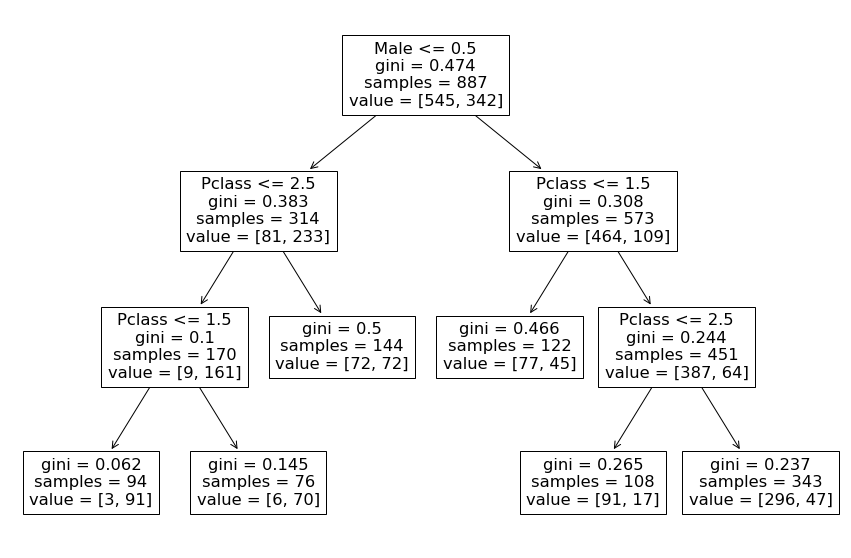

In [54]:
#Another method to visualize the decision tree

import matplotlib.pyplot as plt 
from sklearn import tree 
 
feature_names = ['Pclass', 'Male']

X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier() 
dt.fit(X, y) 

fig = plt.figure(figsize=(15,10)) 
tree.plot_tree(dt, feature_names=feature_names) 
plt.show()

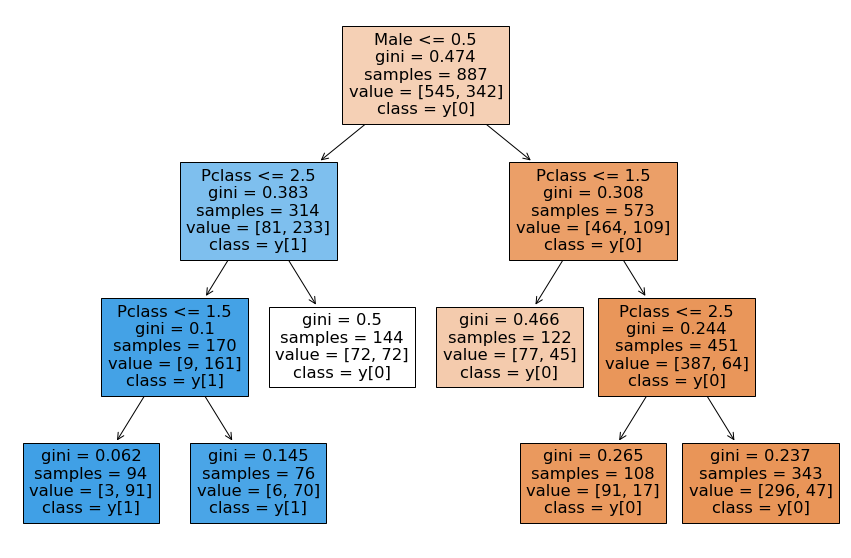

In [56]:
import matplotlib.pyplot as plt 
from sklearn import tree 
 
feature_names = ['Pclass', 'Male']

X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier() 
dt.fit(X, y) 

fig = plt.figure(figsize=(15,10)) 
tree.plot_tree(dt, feature_names=feature_names, class_names = True, filled = True) 
plt.show()

a) shows the decision tree in color, depending on the outcome of each decision

b) give the y-value for the decision as well:

# Overfitting in Decision Trees

Overfitting is when we do a good job of building a model for the training set, but it doesn’t perform well on the test set.
 
Decision Trees are incredibly prone to overfitting. Since they can keep having additional nodes in the tree that split on features, the model can really dig deep into the specifics of the training set. Depending on the data, this might result in a model that doesn’t capture the true nature of the data and doesn’t generalize.

Maybe we just have a single datapoint that goes to a leaf node. It might not make sense to have that additional split.

# Pruning


Pruning the tree. This means we make the tree smaller with the goal of reducing overfitting.

There are two types of pruning: pre-pruning & post-pruning. 

     In pre-pruning, we have rules of when to stop building the tree, so we stop building before the tree is too big.
     In post-pruning we build the whole tree and then we review the tree and decide which leaves to remove to make the 
     tree smaller.
     
Pre-pruning techniques are easy to implement. They include;

     • Max depth: Only grow the tree up to a certain depth, or height of the tree. If the max depth is 3, there will be at 
       most 3 splits for each datapoint.
     • Leaf size: Don’t split a node if the number of samples at that node is under a threshold
     • Number of leaf nodes: Limit the total number of leaf nodes allowed in the tree
     
Pruning is a balance. For example, if you set the max depth too small, you won’t have much of a tree and you won’t have any predictive power. This is called underfitting. Similarly if the leaf size is too large, or the number of leaf nodes too small, you’ll have an underfit model.

There’s no hard science as to which pre-pruning method will yield better results. In practice, we try a few different values for each parameter and cross validate to compare their performance.



# Pruning your Decision Tree in Scikit-learn

**Pre-pruning Parameters**

    max_depth, min_samples_leaf, and max_leaf_nodes.
    

**Prepruning Technique 1: Limiting the depth**

We use the max_depth parameter to limit the number of steps the tree can have between the root node and the leaf nodes.

**Prepruning Technique 2: Avoiding leaves with few datapoints**

We use the min_samples_leaf parameter to tell the model to stop building the tree early if the number of datapoints in a leaf will be below a threshold.

**Prepruning Technique 3: Limiting the number of leaf nodes**

We use max_leaf_nodes to set a limit on the number of leaf nodes in the tree.


Here’s a code for creating a Decision Tree with the following properties:

    • max depth of 3
    • minimum samples per leaf of 2
    • maximum number of leaf nodes of 10

    dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, max_leaf_nodes=10)

# Grid Search

We’re not going to be able to intuit best values for the pre-pruning parameters. In order to decide on which to use, we use cross validation and compare metrics.

We could loop through our different options, but scikit-learn has a grid search class built in that will do this for us.

The class is called GridSearchCV. We start by importing it.

    from sklearn.model_selection import GridSearchCV

GridSearchCV has four parameters that we’ll use:

    1. The model (in this case a DecisionTreeClassifier)
    2. Param grid: a dictionary of the parameters names and all the possible values
    3. What metric to use (default is accuracy)
    4. How many folds for k-fold cross validation
    
We create the param grid variable. We give a list of all the possible values for each parameter that we want to try.

    param_grid = {
        'max_depth': [5, 15, 25],
        'min_samples_leaf': [1, 3],
        'max_leaf_nodes': [10, 20, 35, 50]}
        
Now we create the grid search object. We’ll use the above parameter grid, set the scoring metric to the F1 score, and do a 5-fold cross validation.
     
     dt = DecisionTreeClassifier()
     gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
     
Now we can fit the grid search object. This can take a little time to run as it’s trying every possible combination of the parameters.

     gs.fit(X, y)
     
Since we have 3 possible values for max_depth, 2 for min_samples_leaf and 4 for max_leaf_nodes, we have 3 * 2 * 4 = 24 different combinations to try

We use the best_params_ attribute to see which model won.

In [60]:
from sklearn.model_selection import GridSearchCV

X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}

dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'max_depth': 15, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}


We see that the best model has a maximum depth of 15, maximum number of leaf nodes as 35 and minimum samples per leaf of 1.

In [63]:
print("best score:", gs.best_score_)

best score: 0.7738842268718757


The best_score_ attribute tells us the score of the winning model.

# Decision Tree Pros and Cons

**Computation**

When talking about how much computation is required for a machine learning algorithm, we separate it into two questions: how much computation is required to build the model and how much is required to predict.

A decision tree is very computationally expensive to build. This is because at every node we are trying every single feature and threshold as a possible split. We have to calculate the information gain of each of these possible splits each time. This is computationally very expensive.

Predicting with a decision tree on the other hand, is computational very inexpensive. You just need to ask a series of yes/no questions about the datapoint to get to the prediction.

Generally we care much more about the computation time for prediction than training. Predictions often need to happen in real time while a user is waiting for a result.

**Performance**

Decision Trees can perform decently well depending on the data though, they are prone to overfitting. Since a leaf node can have just one datapoint that lands there, it gives too much power to individual datapoints.

To remedy the overfitting issues, decision trees generally require some tuning to get the best possible model. Pruning techniques are used to limit the size of the tree and they help mitigate overfitting.

Decision Trees often take work to perform on par with how other models perform with no tuning.

**Interpretability**

The biggest reason that people like choosing decision trees is because they are easily interpretable. Depending on what you’re building a model for, you might need to give a reason why you made a certain prediction. A non-technical person can interpret a Decision Tree so it’s easy to give an explanation of a prediction.

This particularly comes into play in legal situations. Say you are a bank and have a model to predict whether a person should be given a loan or not. It is important to be able to explain why the model made the decision, otherwise you could hide discriminatory practices within the model.

Interpretability is the biggest advantage of Decision Trees. It will depend on the situation whether this is important for your problem.